In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os

In [2]:
baseline = pd.read_csv("baselineTableOfRatAppearencesByCluster.csv")
#display(baseline)

In [23]:
#returns a dictionay of each rat's probabilities for the J1-J4 Clusters
def createProbabilityChartsForIndividualRats(baselineReactionTimeData,ratList,desiredDirectory,homeDirectory,experiment):
    ratProbabilityDict = {}
    os.chdir(desiredDiectory)
    for i in ratList:
        tempDF = baselineReactionTimeData[baselineReactionTimeData['Name'].isin([i])]
        numberOfAppearencesList = tempDF.numberOfAppearences.values.tolist()
        numberOfAppearencesList = list(set(numberOfAppearencesList))
        if numberOfAppearencesList[0] != 0 and len(numberOfAppearencesList) >1:
            #display(tempDF)
            clusters = tempDF.Cluster.values.tolist()
            #display(clusters)
            totalAppearences = sum(tempDF.numberOfAppearences.values.tolist())
            ratProbabilities = np.array(tempDF.numberOfAppearences.values.tolist()) / totalAppearences
            #display(ratProbabilities)
            plt.bar(clusters,ratProbabilities)
            plt.title(i+"'s Reaction Time Max Vs Shift Probabilities")
            plt.xlabel('Clusters')
            plt.ylabel('Probabilities')
            plt.ylim((0,1))
            plt.savefig(i+"'s"+experiment+" Reaction Time Max Vs Shift Probabilities'")
            plt.show()
            ratProbabilityDict[i] = ratProbabilities
            
            
    os.chdir(homeDirectory)
    return ratProbabilityDict

In [24]:
#filters the given data down to just the Reaction Time J1-J4 clusters
#takes a data frame
#returns unique list of all rats in givne data
#returns the formatted data
def formatGivenData(givenDataSet):
    formattedData = pd.DataFrame(columns = ['Name','Cluster'])
    formattedData[['Name','Cluster']] = baseline['name_and_cluster'].str.split('|',expand=True)
    formattedData['numberOfAppearences'] = baseline['numberOfAppearences'].copy()
    allReactionTimeClusters = ["J1","J2","J3","J4"]
    reactionTimeData = formattedData[formattedData['Cluster'].isin(allReactionTimeClusters)]
    ratList= reactionTimeData.Name.values.tolist()
    ratList = list(set(ratList))
    return reactionTimeData,ratList

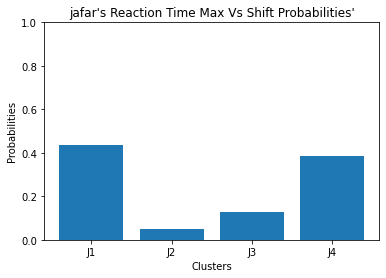

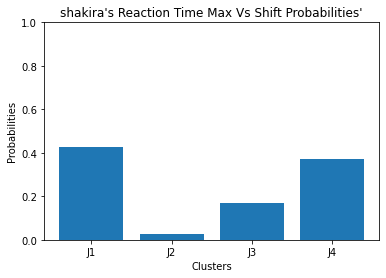

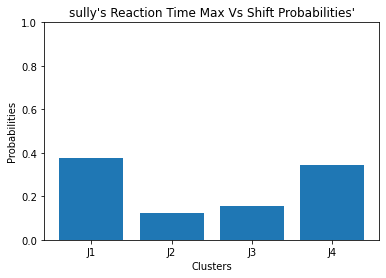

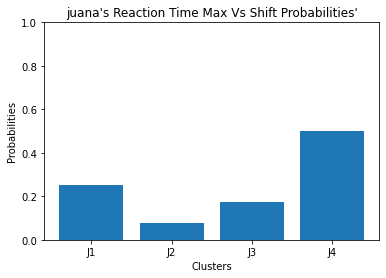

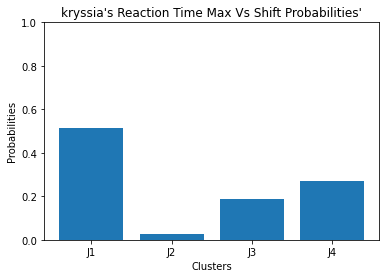

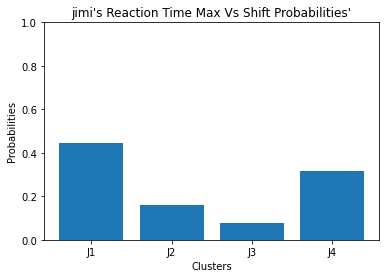

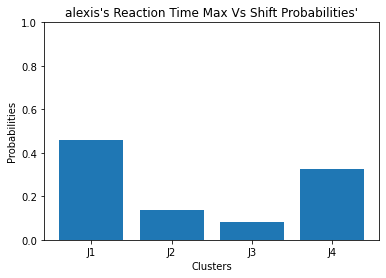

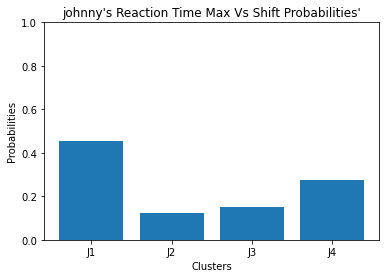

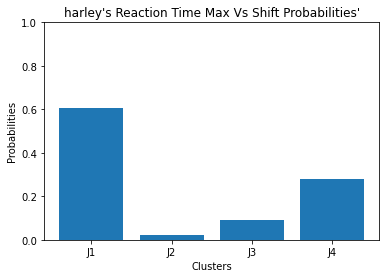

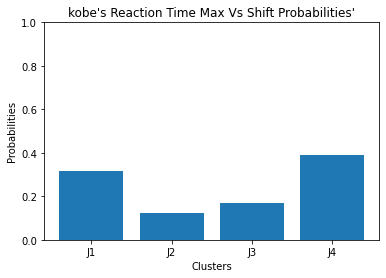

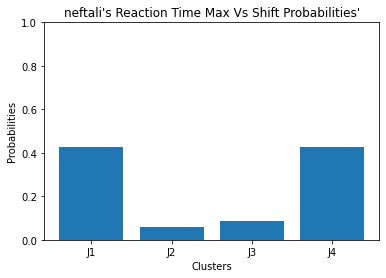

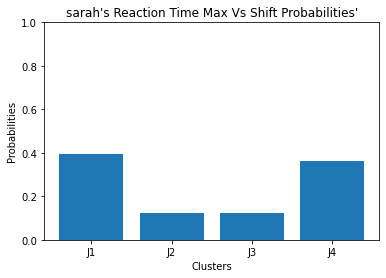

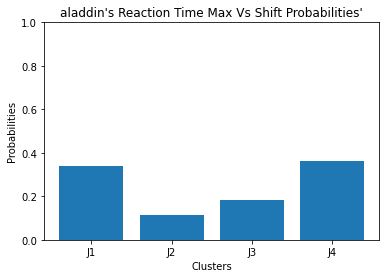

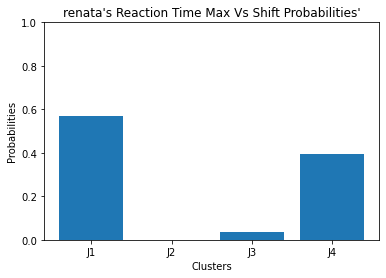

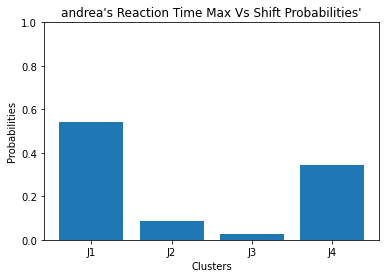

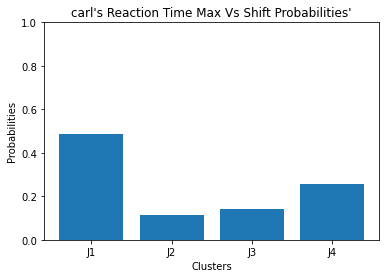

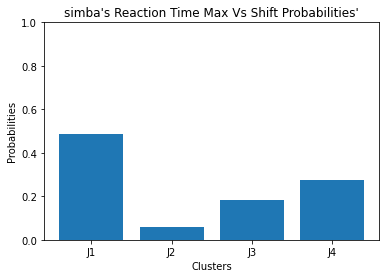

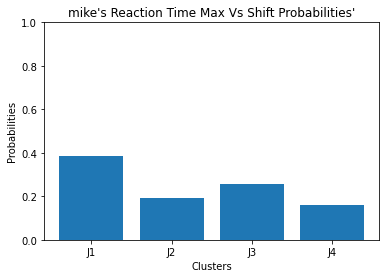

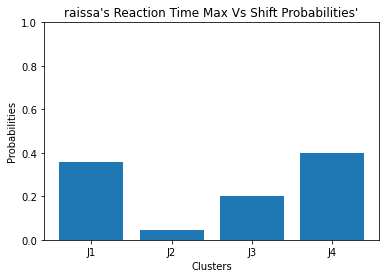

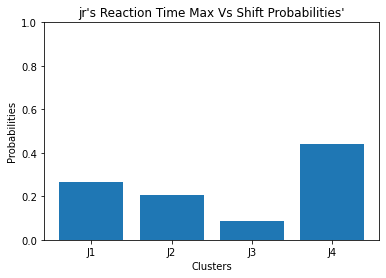

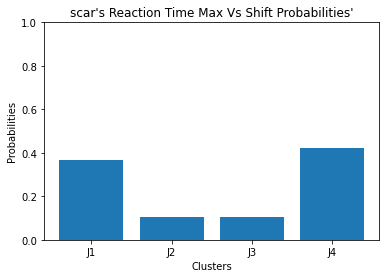

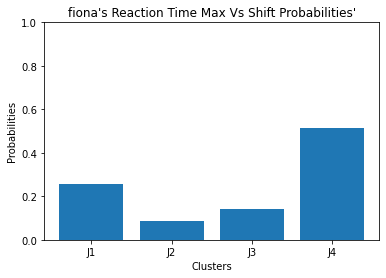

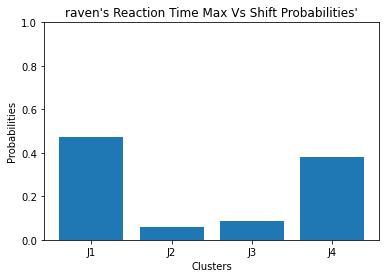

In [25]:
baselineReactionTimeData,baselineRatList = formatGivenData(baseline)
#display(baselineReactionTimeData)
currentDirectory = os.getcwd()

createProbabilityChartsForIndividualRats(baselineReactionTimeData,baselineRatList,)